In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
recipes_df = pd.read_pickle('recipes.pkl')
interactions_df = pd.read_pickle('interactions.pkl')
food_df = pd.read_pickle('food.pkl')

In [4]:
#Kiem tra kich thuoc cua du lieu
print(recipes_df.shape)
print(interactions_df.shape)
print(food_df.shape)

(221617, 25)
(1071520, 6)
(216952, 28)


In [5]:
recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,...,protein,saturated_fat,carbohydrates,submitted_month,submitted_year,dairy-free,gluten-free,low-carb,vegan,vegetarian
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",...,2.0,0.0,4.0,Sep,2005,0,0,0,0,1
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",...,22.0,35.0,1.0,Jun,2002,0,0,0,0,0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",...,39.0,27.0,5.0,Feb,2005,0,0,0,0,0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",...,14.0,8.0,20.0,Apr,2003,0,0,0,0,0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",...,3.0,0.0,28.0,Oct,2002,0,0,0,0,1


In [6]:
interactions_df.head()

,user_id,recipe_id,date,rating,review_month,review_year
0,38094,40893,2003-02-17,4,Feb,2003
1,1293707,40893,2011-12-21,5,Dec,2011
2,8937,44394,2002-12-01,4,Dec,2002
3,126440,85009,2010-02-27,5,Feb,2010
4,57222,85009,2011-10-01,5,Oct,2011


In [7]:
recipes_df.describe()

,minutes,submitted,n_steps,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,submitted_year,dairy-free,gluten-free,low-carb,vegan,vegetarian
count,221617.000000,221617,221617.000000,221617.000000,221617.000000,221617.000000,221617.000000,221617.000000,221617.000000,221617.000000,221617.000000,221617.000000,221617.000000,221617.000000,221617.000000,221617.000000,221617.000000
mean,117.729218,2006-11-03 01:38:54.476145408,8.954363,8.878209,463.041153,35.191813,82.467320,29.726650,34.057694,44.219388,15.183023,2006.358303,0.000844,0.025188,0.185609,0.044130,0.155376
min,0.000000,1999-08-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2004-09-02 00:00:00,6.000000,6.000000,171.600000,8.000000,9.000000,5.000000,6.000000,7.000000,4.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,2007-01-15 00:00:00,8.000000,9.000000,307.900000,20.000000,24.000000,14.000000,18.000000,22.000000,9.000000,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,2008-10-18 00:00:00,12.000000,11.000000,510.100000,40.000000,67.000000,32.000000,50.000000,51.000000,16.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,288000.000000,2018-12-04 00:00:00,21.000000,43.000000,434360.200000,17183.000000,362729.000000,29338.000000,6552.000000,10395.000000,36098.000000,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,1965.546000,NaN,4.461082,3.598013,1189.503644,76.612243,811.013593,131.934725,57.051943,94.800054,82.754460,2.981621,0.029036,0.156695,0.388791,0.205385,0.362264


 Nutrition Analysis


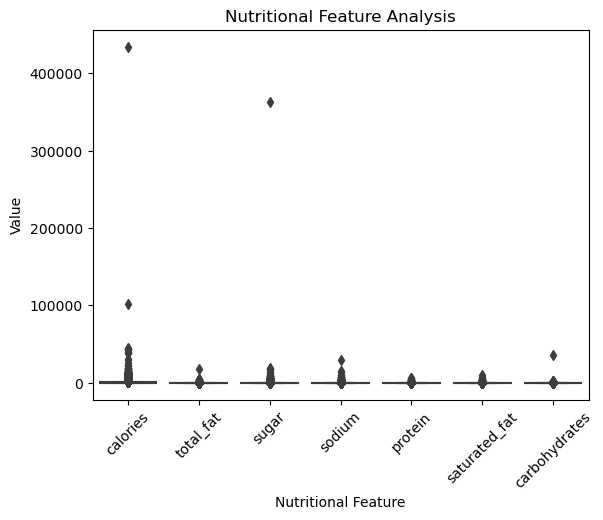

In [8]:
#Lua chon cac cot dinh duong de phan tich
nutrients = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']

sns.boxplot(data=recipes_df[nutrients])
plt.xlabel('Nutritional Feature')
plt.ylabel('Value')
plt.title('Nutritional Feature Analysis')
plt.xticks(rotation = 45)
plt.show()


Correlation Analysis


In [9]:
merged_df = pd.merge(recipes_df, interactions_df, left_on = 'id', right_on = 'recipe_id')

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032305 entries, 0 to 1032304
Data columns (total 31 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   name             1032305 non-null  object        
 1   id               1032305 non-null  object        
 2   minutes          1032305 non-null  int64         
 3   contributor_id   1032305 non-null  object        
 4   submitted        1032305 non-null  datetime64[ns]
 5   tags             1032305 non-null  object        
 6   nutrition        1032305 non-null  object        
 7   n_steps          1032305 non-null  int64         
 8   steps            1032305 non-null  object        
 9   ingredients      1032305 non-null  object        
 10  n_ingredients    1032305 non-null  int64         
 11  calories         1032305 non-null  float64       
 12  total_fat        1032305 non-null  float64       
 13  sugar            1032305 non-null  float64       
 14  so

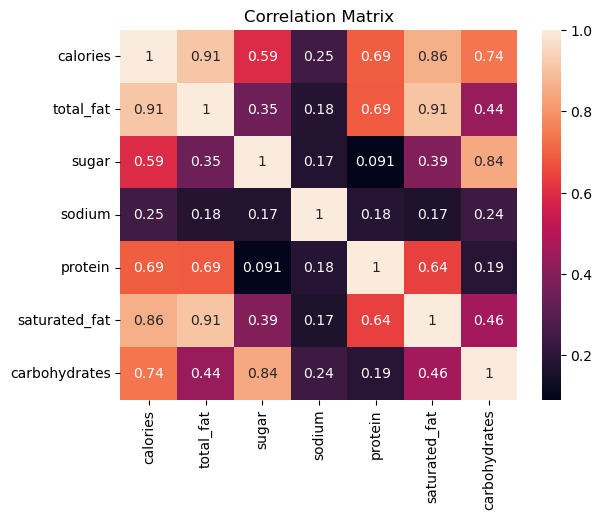

In [14]:
correlation_matrix = merged_df[['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

Mối tương quan được thể hiện mạnh mẽ ở 2 biến độc lập 'calories' và 'total_fat' và ở 'calories' và 'saturated_fat'. Khi tổng lượng calo tăng, có 1 lượng chất béo đáng kể sẽ tăng (saturated_fat và total_fat). Điều này là đúng bởi vì chất béo là nguồn năng lượng tập trung, chứa nhiều calo hơn so với những chất khác như protein hay carbonhydrates (trong thực tế cũng như vậy). Do đó, những công thức chứa lưu lượng chất béo cao hơn thường có lượng calo cao hơn.


Với biến Carbonhydrates cũng tương tự, correlation giữa chúng và calories là 0.73, chúng có mối tương quan khá tốt : khi calories tăng, đồng thời 1 lượng đáng kể carb cũng sẽ tăng. 


User Engagement Analysis

In [15]:
interactions_df['rating'].value_counts()

rating
5    816364
4    187360
3     40855
2     14123
1     12818
Name: count, dtype: int64

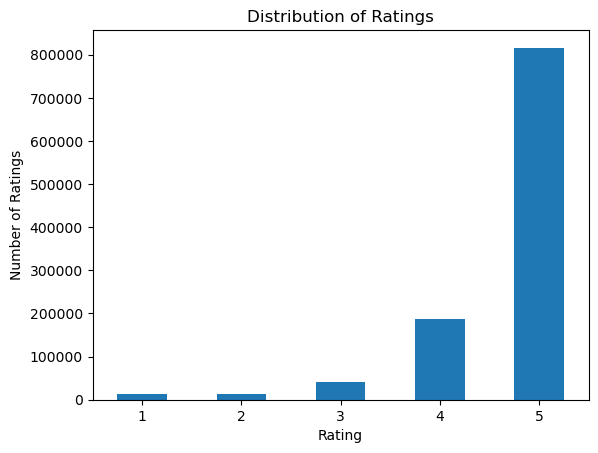

In [16]:
interactions_df['rating'].value_counts().sort_index().plot(kind = "bar")
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Ratings')
plt.xticks(rotation = 0)
plt.show()

Người dùng luôn đưa ra xếp hạng cao cho các công thức nấu ăn. Mặc dù điều này có thể gợi ý sự hài lòng chung đối với các công thức nấu ăn, nhưng điều quan trọng là phải xem xét các cách giải thích khác. Có nhiều khả năng những người dùng không hài lòng với một công thức nấu ăn sẽ ít có xu hướng để lại xếp hạng hoặc họ cho rằng bất kỳ kết quả bất lợi nào là do kỹ năng nấu nướng của chính họ hơn là do chính công thức đó. Hiện tượng này có thể dẫn đến sự thiên vị tích cực trong xếp hạng, vì người dùng có xu hướng tin tưởng vào tác giả công thức nấu ăn. Do đó, mặc dù xếp hạng cao cho thấy phản hồi tích cực tổng thể, nhưng điều cần thiết là phải giải thích chúng trong bối cảnh có thể có xu hướng xếp hạng và hành vi của người dùng.

Điều này có thể đặc biệt ảnh hưởng tới quá trình huấn luyện mô hình khi dữ liệu đang có xu hướng mất cân bằng rõ ràng (Imbalanced Data)

User Interactions over time

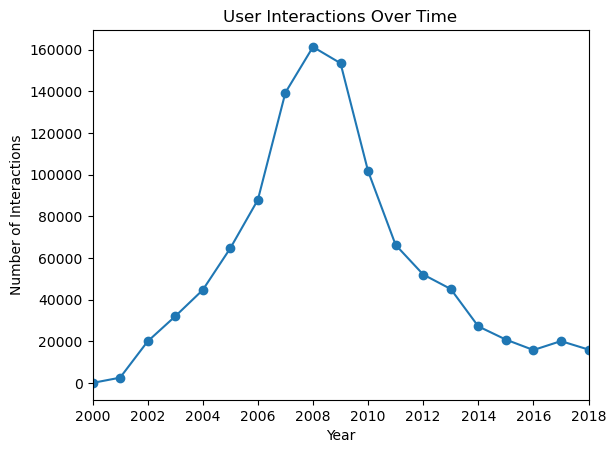

In [17]:
#Ta se tinh so luong nguoi dung theo nam nham theo doi xu huong hanh vi cua nguoi dung
yearly_interaction_counts = interactions_df['review_year'].value_counts().sort_index()
yearly_interaction_counts.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Interactions')
plt.title('User Interactions Over Time')
plt.xlim(2000, 2018)
plt.show()

Nhìn vào biểu đồ, ta có thể thấy đỉnh điểm về tương tác của người dùng là vào năm 2008. Điều này xảy ra có thể do 1 vài nguyên nhân, chẳng hạn như số lượng người dùng đăng kí tăng đột biến -> mức độ phổ biến của nền tảng tăng lên (ta sẽ không bàn tới quá nhiều về vấn đề này).


Recipe Analysis


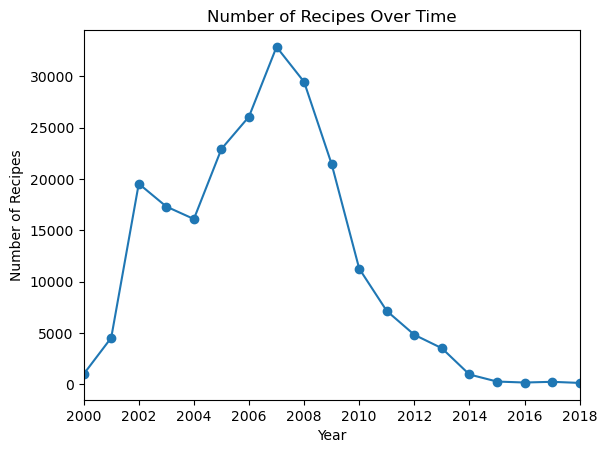

In [18]:
# Perform time-based analysis
time_analysis = recipes_df.groupby('submitted_year').size()
time_analysis.plot(kind='line', marker='o')
plt.xlim(2000, 2018)
plt.xlabel('Year')
plt.ylabel('Number of Recipes')
plt.title('Number of Recipes Over Time')
plt.show()

Biểu đồ mô tả mô hình thời gian của các lần gửi công thức nấu ăn từ năm 2000 đến năm 2018. Trục x biểu thị số năm, trong khi trục y biểu thị số lượng công thức nấu ăn. Nó cho thấy rằng số lượng công thức gửi đã tăng đều đặn qua các năm, với mức cao nhất đáng chú ý xảy ra vào năm 2017, nơi có số lượng công thức nấu ăn được gửi cao nhất. Mức cao nhất này có thể là do nhiều yếu tố khác nhau, chẳng hạn như mức độ tương tác của người dùng tăng lên, cơ sở người dùng được mở rộng hoặc các nỗ lực quảng cáo để khuyến khích đóng góp công thức nấu ăn trong khoảng thời gian đó.

Sau khi đạt đỉnh điểm vào năm 2017, số lượng công thức gửi đến giảm dần. Sự sụt giảm này có thể là do một số lý do, chẳng hạn như sự thay đổi trong sở thích của người dùng, thay đổi về động lực của nền tảng hoặc điểm bão hòa trong đóng góp công thức nấu ăn.

Special Diets

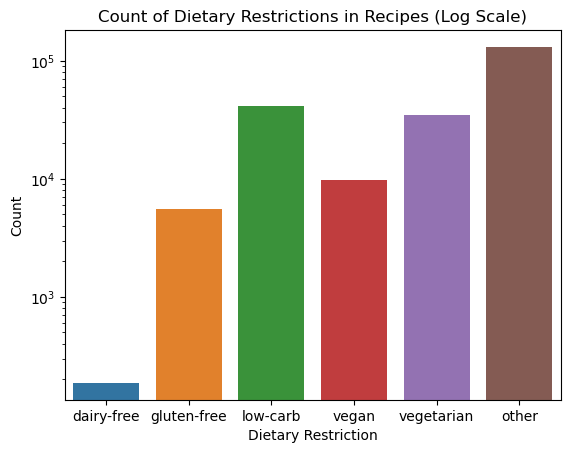

In [19]:
# Calculate the count of recipes for each dietary restriction
dietary_restrictions = ['dairy-free', 'gluten-free', 'low-carb', 'vegan', 'vegetarian']
restriction_counts = recipes_df[dietary_restrictions].sum()

# Add 'none' category when all diet types are 0
restriction_counts['other'] = len(recipes_df) - restriction_counts.sum()

# Plot bar chart of dietary restriction counts with log scale
sns.barplot(x=restriction_counts.index, y=restriction_counts.values)
plt.xlabel('Dietary Restriction')
plt.ylabel('Count')
plt.yscale('log')
plt.title('Count of Dietary Restrictions in Recipes (Log Scale)')
plt.show()

Biểu đồ minh họa sự phân bố của các hạn chế ăn kiêng khác nhau trong tập dữ liệu công thức nấu ăn. Các thanh đại diện cho số lượng công thức nấu ăn thuộc từng danh mục chế độ ăn kiêng. Thứ tự, từ số lượng cao nhất đến thấp nhất, như sau: không có (công thức nấu ăn không có bất kỳ hạn chế cụ thể nào về chế độ ăn uống), ít carb, ăn chay, thuần chay, không chứa gluten và không có sữa. Điều quan trọng cần lưu ý là các công thức nấu ăn có thể có nhiều hạn chế về chế độ ăn uống, vì các danh mục này không loại trừ lẫn nhau. Biểu đồ nêu bật mức độ phổ biến khác nhau của các sở thích ăn kiêng khác nhau giữa các công thức nấu ăn trong tập dữ liệu.

Lưu ý rằng việc sử dụng thang đo log trong biểu đồ sẽ giúp làm nổi bật tỷ lệ tương đối của từng danh mục hạn chế trong chế độ ăn uống, đặc biệt khi có sự khác biệt đáng kể về số lượng

Popular Recipes

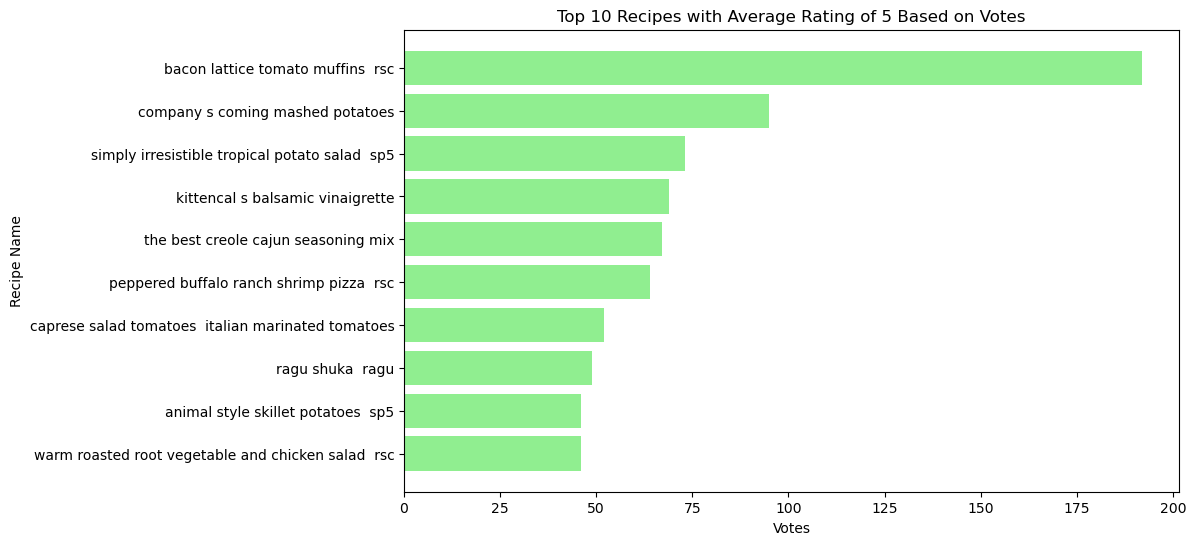

In [20]:
filtered_recipes = food_df[food_df['average_rating'] == 5]
top_recipes = filtered_recipes.nlargest(10, 'votes')

plt.figure(figsize=(10, 6))
plt.barh(top_recipes['name'], top_recipes['votes'], color='lightgreen')
plt.xlabel('Votes')
plt.ylabel('Recipe Name')
plt.title('Top 10 Recipes with Average Rating of 5 Based on Votes')
plt.gca().invert_yaxis()
plt.show()